In [5]:
%matplotlib inline

In [6]:
from matplotlib import pyplot as plt

In [7]:
def npf(i, a, b, c, d):
    return a * b**c / (b**c + np.abs(i-d)**c)

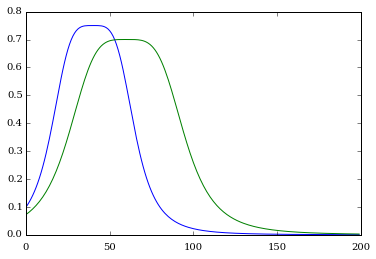

In [8]:
i = np.arange(200)
plt.plot(i, npf(i, 0.75, 25.0, 4.0, 40.0))
plt.plot(i, npf(i, 0.70, 35.0, 4.0, 60.0))